# Automation in Civil/Structural Engineering with Selenium

This notebook demonstrates how Selenium can be utilized in civil and structural engineering for automating data retrieval and processing tasks. We'll cover:

1. Extracting cross-sectional area data from the AISC Shapes Database.
2. Scraping annual temperature data from US Climate Data.
3. Calculating and plotting the thermal expansion of structural elements.

## Setup and Dependencies

Ensure you have Selenium, Pandas, Openpyxl and Matplotlib installed in your environment. We will start by importing necessary libraries and setting up our web driver for Selenium.

In [10]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
# Add any other imports you need

## Extracting Data from AISC Shapes Database

We'll extract the cross-sectional area for a specific shape (e.g., W36X302) from the 'aisc-shapes-database-v16.0.xlsx' file.

You can find it here: https://www.aisc.org/publications/steel-construction-manual-resources/16th-ed-steel-construction-manual/aisc-shapes-database-v16.0/

In [19]:
# Function to extract the cross-sectional area of a specified AISC shape from an Excel file in the 'data' folder

def extract_area_from_excel(filename, shape_label):
    """
    Extracts the cross-sectional area of a specified AISC shape from an Excel file in the 'data' folder.

    Parameters:
    filename (str): The name of the Excel file.
    shape_label (str): The label of the AISC shape.

    Returns:
    float: The cross-sectional area of the shape.
    """
    file_path = f"data/{filename}"  # Constructs the path to the file in the 'data' folder
    df = pd.read_excel(file_path, sheet_name='Database v16.0')
    area = df[df['AISC_Manual_Label'] == shape_label]['A'].values[0]
    return area

# Call the function and store the result in a variable
section_area = extract_area_from_excel('aisc-shapes-database-v16.0.xlsx', 'W36X318')

# Print the extracted area
print("Cross Sectional Area: ", section_area, "in^2")

Cross Sectional Area:  93.4 in^2


## Web Scraping with Selenium

In this section, we'll use Selenium to scrape data from a website. Our objective is to extract the maximum and minimum annual temperatures from the following URL:

[Climate data for Anchorage, Alaska](https://www.usclimatedata.com/climate/anchorage/alaska/united-states/usak0012)

Selenium is ideal for web scraping tasks because it can programmatically control a browser, interact with web elements, and extract data, mimicking human browsing behavior. This capability is particularly useful for websites that load data dynamically with JavaScript, which traditional HTTP requests via libraries like `requests` cannot handle.

*This is what the tables looks like.*

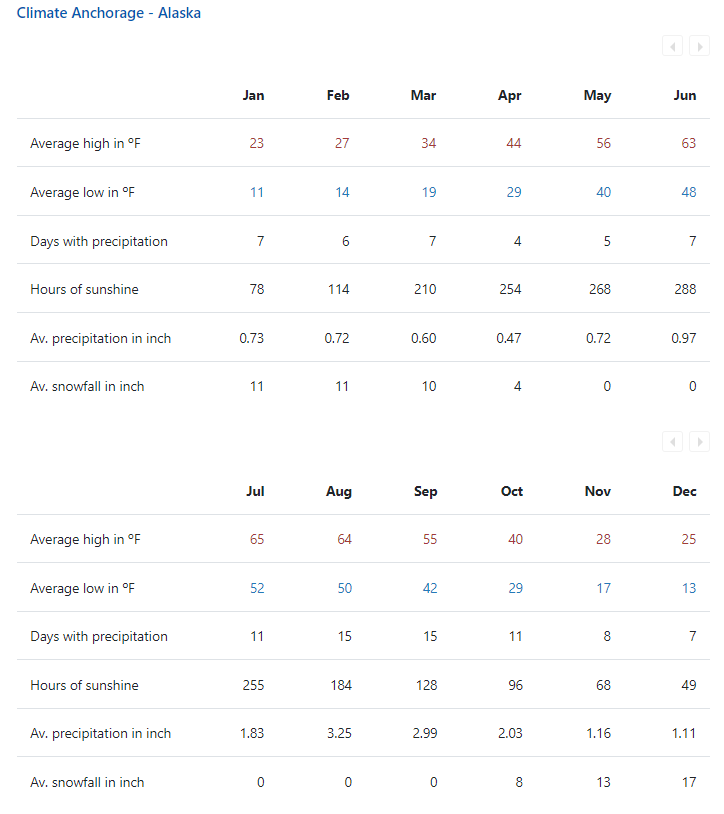

### Setting Up Selenium

To use Selenium, you need:

1. **Selenium Library**: Installed in your Python environment.
2. **WebDriver**: A driver program that controls the browser. For Chrome, it's ChromeDriver; for Firefox, it's GeckoDriver. The driver must be compatible with the version of the browser installed on your machine.

### Scraping Process

The following steps outline the scraping process:

1. **Initialize WebDriver**: Start a browser session.
2. **Navigate to the Web Page**: Load the URL of the website you want to scrape.
3. **Locate and Extract Data from Tables**: Identify the tables containing the temperature data and extract the high and low temperatures from these tables.
4. **Combine and Analyze Data**: Aggregate the temperatures from both tables to find the overall highest and lowest temperatures for the entire year.
5. **Close WebDriver**: End the browser session to free up resources.

### Example Code

The provided Python code demonstrates how to extract the annual high and low temperatures from the specified URL using Selenium. It involves identifying two separate tables for different parts of the year, extracting temperature data from both, and then determining the highest and lowest temperatures. Note that the specific CSS selectors used may need to be updated if the website's layout changes.

### Running the Code

Execute the code to see the results. Ensure that you have a stable internet connection and that the website's URL is correct. The output will display the scraped temperature data, showing the highest and lowest temperatures recorded in Anchorage, Alaska, over the year.

In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

# Initialize the WebDriver
driver = webdriver.Chrome(service=webdriver.ChromeService(ChromeDriverManager().install()))

# URL to scrape
url = "https://www.usclimatedata.com/climate/anchorage/alaska/united-states/usak0012"
driver.get(url)

def extract_temps(table_id):
    table = driver.find_element(By.ID, table_id)

    # Extracting the high and low temperatures
    high_temp_elements = table.find_elements(By.CSS_SELECTOR, "td.high")
    low_temp_elements = table.find_elements(By.CSS_SELECTOR, "td.low")

    high_temps = [int(temp.text) for temp in high_temp_elements if temp.text.isdigit()]
    low_temps = [int(temp.text) for temp in low_temp_elements if temp.text.isdigit()]

    return high_temps, low_temps

# Extract temperatures from both tables
high_temps_1, low_temps_1 = extract_temps("monthly_table_one")
high_temps_2, low_temps_2 = extract_temps("monthly_table_two")

# Combine the results and find the overall highest and lowest temperatures
all_high_temps = high_temps_1 + high_temps_2
all_low_temps = low_temps_1 + low_temps_2

highest_temp = max(all_high_temps)
lowest_temp = min(all_low_temps)

print(f"Highest Temperature: {highest_temp}ºF")
print(f"Lowest Temperature: {lowest_temp}ºF")

# Close the WebDriver
driver.quit()

Highest Temperature: 65ºF
Lowest Temperature: 11ºF


## Thermal Expansion Analysis in Python

This script is designed to analyze the thermal expansion of a steel member subject to temperature changes. The member is assumed to be made of A572 Grade 50 steel (or S355 for metric measurements).

### Steps

1. **Importing Libraries**: 
   - `matplotlib.pyplot` for plotting the graph.
   - `numpy` for numerical calculations.

2. **Setting Parameters**: 
   - The coefficient of thermal expansion (`alpha`) for A572 Grade 50 steel is defined.
   - The maximum and minimum temperatures (`max_temp` and `min_temp`) are set based on previously extracted data.
   - The range of member lengths (`lengths`) is specified from 0 to 40 feet, in 1-foot increments.

3. **Calculating Thermal Expansion**:
   - The change in temperature (`delta_temp`) is calculated.
   - Thermal expansion for each length is calculated using the formula `Delta L = alpha * L * Delta T`, where `L` is converted to inches for accuracy.

4. **Plotting the Results**:
   - A plot is generated to visualize thermal expansion versus member length.
   - The x-axis represents the member length in feet, and the y-axis represents the thermal expansion in inches.

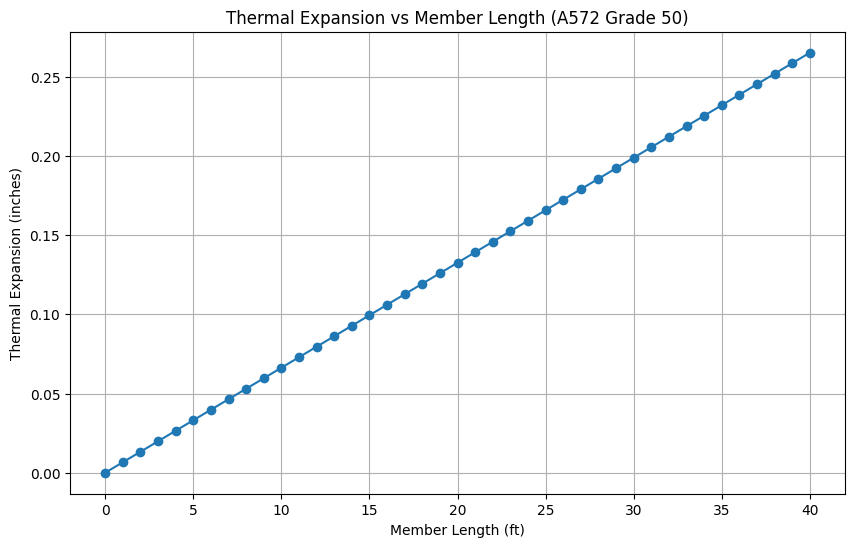

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficient of thermal expansion for A572 Grade 50 steel in in/in/°F
alpha = 6.5e-6 # in/in/°F, from https://www.engineeringtoolbox.com/linear-expansion-coefficients-d_95.html

# Maximum change in temperature (Delta T) in °F
highest_temp = 65  # Highest temperature in °F, extracted earlier
lowest_temp = -20  # Lowest temperature in °F, extracted earlier
delta_temp = highest_temp - lowest_temp  # Delta T in °F

# Assumed member length range from 0 to 40 feet, in 1 ft increments
lengths = np.arange(0, 41, 1)  # Lengths in feet

# Area extracted earlier (in square inches)
# Replace this with the actual area value you extracted
area = section_area  # area value, extracted earlier from the Excel file, in square inches

# Calculate thermal expansion for each length
expansions = alpha * delta_temp * lengths * 12  # Convert lengths to inches

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lengths, expansions, marker='o')
plt.title('Thermal Expansion vs Member Length (A572 Grade 50)')
plt.xlabel('Member Length (ft)')
plt.ylabel('Thermal Expansion (inches)')
plt.grid(True)
plt.show()
